 # Importing Important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


# Trip Duration Analysis

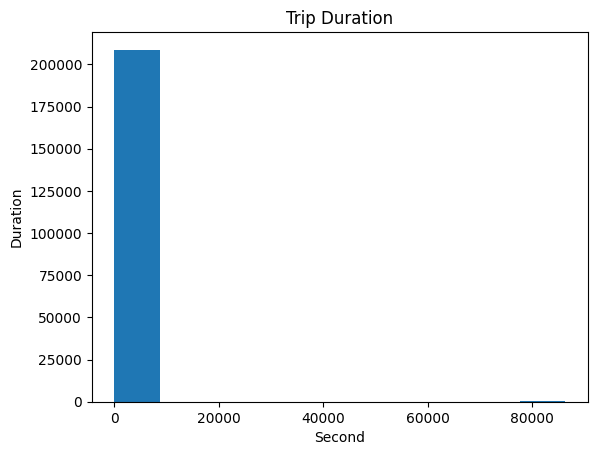

In [4]:
plt.hist(df["trip_duration"])
plt.title('Trip Duration')
plt.xlabel('Second')
plt.ylabel('Duration')
plt.show()

In [5]:
df["trip_duration"].describe()

count    209673.000000
mean       1173.181478
std        4775.653621
min           0.000000
25%         446.000000
50%         707.000000
75%        1098.000000
max       86387.000000
Name: trip_duration, dtype: float64

# Distance Traveled Analysis

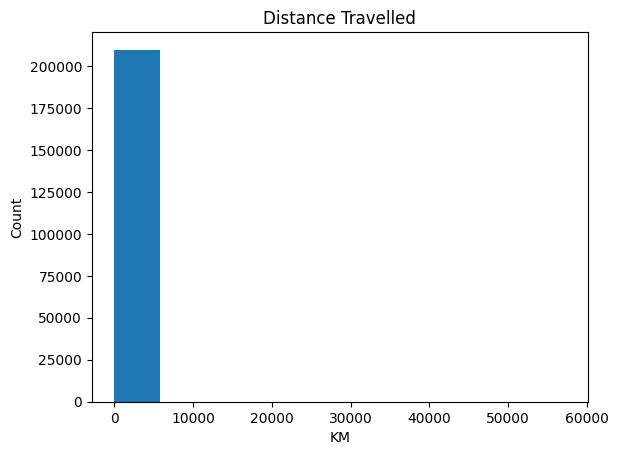

In [6]:
plt.hist(df["distance_traveled"])
plt.title('Distance Travelled')
plt.xlabel('KM')
plt.ylabel('Count')
plt.show()


In [7]:
df["distance_traveled"].describe()

count    209673.000000
mean          5.054431
std         125.217419
min           0.020000
25%           1.950000
50%           3.200000
75%           5.730000
max       57283.910000
Name: distance_traveled, dtype: float64

# Number of passenger analysis

In [8]:
df['num_of_passengers'].value_counts()

1.0    179229
2.0     17896
5.0      4713
6.0      3382
3.0      2757
4.0       908
0.0       753
8.0        25
9.0         8
7.0         2
Name: num_of_passengers, dtype: int64

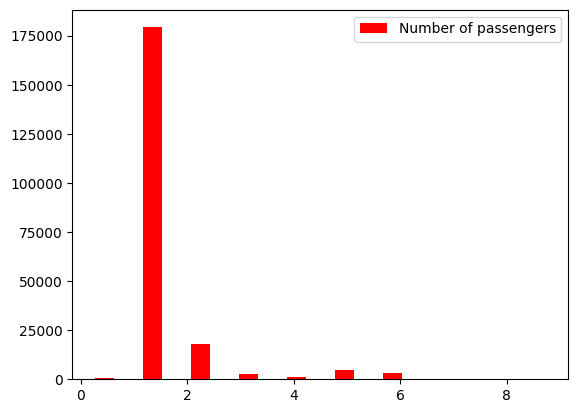

In [9]:

x=df[[ "num_of_passengers"]]
plt.hist(x , rwidth=0.4,color='r',label="Number of passengers")
plt.legend()
plt.show()

# Fare Analysis

In [10]:
df[["fare" , "tip","miscellaneous_fees","total_fare"]]

,fare,tip,miscellaneous_fees,total_fare
0,75.00,24,6.300,105.300
1,105.00,24,13.200,142.200
2,71.25,0,26.625,97.875
3,90.00,0,9.750,99.750
4,45.00,12,13.200,70.200
...,...,...,...,...
209668,150.00,47,5.800,202.800
209669,48.75,12,34.575,95.325
209670,63.75,0,6.000,69.750
209671,56.25,0,13.500,69.750


In [11]:
df["Check_total_fare"]=df["fare"]+df["tip"]+df["miscellaneous_fees"]

In [12]:
df[["Check_total_fare","total_fare"]]

,Check_total_fare,total_fare
0,105.300,105.300
1,142.200,142.200
2,97.875,97.875
3,99.750,99.750
4,70.200,70.200
...,...,...
209668,202.800,202.800
209669,95.325,95.325
209670,69.750,69.750
209671,69.750,69.750


Fare calculated = Total fare

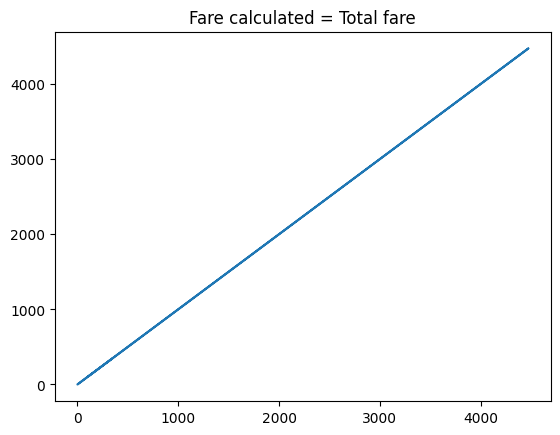

In [13]:
plt.plot(df["Check_total_fare"],df["total_fare"])
plt.title("Fare calculated = Total fare")
plt.show()


In [14]:
corr = df[["trip_duration","distance_traveled","num_of_passengers","total_fare","surge_applied"]].corr()

In [15]:
corr

,trip_duration,distance_traveled,num_of_passengers,total_fare,surge_applied
trip_duration,1.000000,0.005774,-0.001477,0.142159,0.029961
distance_traveled,0.005774,1.000000,-0.000299,0.036677,0.005567
num_of_passengers,-0.001477,-0.000299,1.000000,0.014234,0.006360
total_fare,0.142159,0.036677,0.014234,1.000000,0.267350
surge_applied,0.029961,0.005567,0.006360,0.267350,1.000000


<AxesSubplot: >

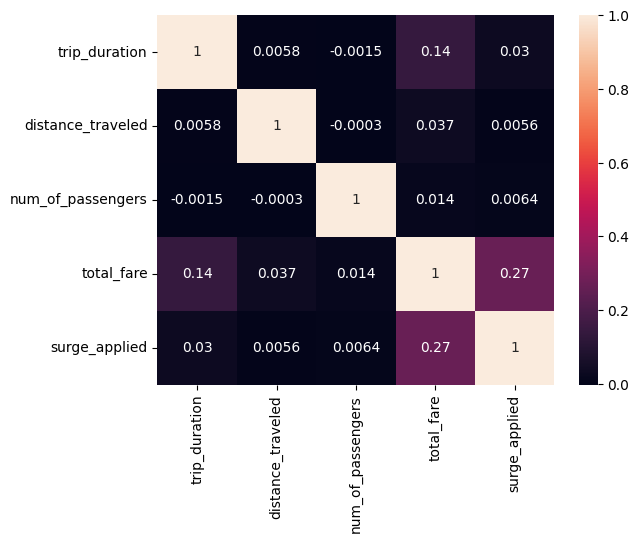

In [16]:
sns.heatmap(corr,annot=True)

In [17]:
df=df.drop(columns=["Check_total_fare"])

# Splitting the dataset

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x=df[["trip_duration","distance_traveled","num_of_passengers","surge_applied"]]

In [20]:
y=df["total_fare"]

In [21]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.4)

In [22]:
xtrain.head(5)

,trip_duration,distance_traveled,num_of_passengers,surge_applied
111393,374.0,2.04,1.0,1
171186,914.0,3.72,1.0,0
56976,435.0,2.35,1.0,0
168674,1261.0,2.74,1.0,0
57676,388.0,2.04,1.0,1


In [23]:
print(len(xtrain) , len(xtest) , len(ytrain) , len(ytest))

125803 83870 125803 83870


# Standardizing the data

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()
scaler.fit(xtrain)
xtrain = scaler.transform(xtrain)
xtrain

array([[4.32935511e-03, 3.52629683e-05, 1.11111111e-01, 1.00000000e+00],
       [1.05802956e-02, 6.45905856e-05, 1.11111111e-01, 0.00000000e+00],
       [5.03547988e-03, 4.06746120e-05, 1.11111111e-01, 0.00000000e+00],
       ...,
       [7.62846262e-03, 4.48642716e-05, 1.11111111e-01, 0.00000000e+00],
       [9.56162386e-03, 6.82565377e-05, 1.11111111e-01, 1.00000000e+00],
       [1.20851517e-02, 1.53271714e-04, 1.11111111e-01, 1.00000000e+00]])

# Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [28]:
xtest = scaler.transform(xtest)
ypred=model.predict(xtest)
ypred

array([108.03942928, 180.71011722, 108.85216399, ..., 109.78136377,
       109.19488987, 110.05518359])

In [29]:
model.score(xtest,ytest)*100

9.258407126181545

# Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
model=RandomForestRegressor()
model.fit(xtrain,ytrain)

RandomForestRegressor()

In [32]:
model.predict(xtest)

array([259.86396964, 509.37375   ,  53.1054    , ...,  91.73925   ,
        70.143875  ,  98.61425   ])

In [33]:
model.score(xtest,ytest)*100

71.0742244306394

# XGBoost Regressor

In [34]:
from xgboost import XGBRegressor

In [35]:

model=XGBRegressor()
model.fit(xtrain,ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [36]:
model.predict(xtest)

array([102.60115 , 579.663   ,  60.007565, ...,  98.692345,  73.56484 ,
        95.27045 ], dtype=float32)

In [37]:
model.score(xtest,ytest)*100

70.82500671866872

In [38]:
df.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [39]:
model.predict([[748,3,1.0,0]])

array([1015.9212], dtype=float32)

In [40]:
import joblib
joblib.dump(model,'taxi_fare_predictor.pkl')

['taxi_fare_predictor.pkl']

In [45]:
x=df[["distance_traveled"]]

In [46]:
y=df[["total_fare"]]

In [47]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.4)

In [50]:
model=XGBRegressor()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)*100

68.20111744320327

In [55]:
import joblib
joblib.dump(model,'taxi_fare_predictor.pkl')

['taxi_fare_predictor.pkl']